# Project - Twitter US Airline Sentiment Analysis


## **Context:**

- Background and Context:

Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.

 

Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

#### The purpose of this analysis is to make up a prediction model where we will be able to predict whether a tweet is positive or negative. In this analysis, we will focus the positive/negative/neutral sentiment of the tweets.



### Import the libraries, load dataset, print shape of data, data description.

In [4]:
!pip install contractions

In [5]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
#### load dataset
data=pd.read_csv('Tweets.csv') # Reading csv file

In [9]:
data.shape                                               # print shape of data.

(14640, 15)

In [10]:
data.head(10)                                              # Print first 10 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [11]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [13]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

- 'tweet_id', 'airline_sentiment', 'airline_sentiment_confidence','negativereason', 'negativereason_confidence', 'airline',    'airline_sentiment_gold', 'name', 'negativereason_gold',  'retweet_count', 'text', 'tweet_coord', 'tweet_created',   'tweet_location', 'user_timezone' are the columns
- There are many columns having null values.
- For this task we don't need all columns.
- we just need text and airline sentiment

### Understand of data-columns

In [14]:
#### a. Drop all other columns except “text” and “airline_sentiment”.
data.drop(['tweet_id',  'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created','tweet_location','user_timezone'],axis=1,inplace=True)

In [15]:
#shape of data
data.shape 

(14640, 2)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [17]:
data['airline_sentiment'].value_counts(normalize=True) #identifying class distribution using value_counts

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

- Now we  have the data for training sentiment classifier with text and output as airline sentiment where there are no null values
- We have 9155 rows and 2 columns
- From value counts we can understand that, classes are highly imbalanced

In [18]:
#### c. Print the first 5 rows of data.
data.head()# printing first five columns

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [19]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head(10)                                 # Check first 10 rows of data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


### Data Pre-processing:

     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Conversion to lowercase.
     f. Lemmatize or stemming.
     g. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     h. Print the first 5 rows of data after pre-processing.
We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

#### a. HTML Tag removal

In [20]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser") #html removed using beautiful soup library
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [21]:
# Removing http text
def rem_http(text):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    return text
    

data['text'] = data['text'].apply(lambda x: rem_http(x))
data.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there."
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


- we have removed http in 7 th row

In [22]:
# removing emotions if any

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
data['text'] = data['text'].apply(lambda x: deEmojify(x))
data.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there."
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [23]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there."
8,positive,"@virginamerica Well, I did not…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. you are too good to me."


#### b. Tokenization

In [24]:
# Sentence to tokens
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()    # Look at how tokenized data looks.

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


#### c. Remove numbers

In [25]:
def remove_numbers(words):
  """"Remove numbers from list of tokenized words"""
  new_words = []
  for word in words:
    new_word = re.sub(r'\d', '', word)
    if new_word != '':
      new_words.append(new_word)
  return new_words



#### d. Removal of Special Characters and Punctuations.

In [26]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words



#### e. Conversion to lowercase.

In [27]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [28]:
#removing stopwords is great as it lowers the dimensionality while using vectorization
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))   
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words



#### f. Lemmatize 

In [29]:
#As the data is less ,we used lemmatizing as it is more meaningful than stemming
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [30]:
####applying all preprocesssing
def normalize(words):
    words= remove_numbers(words)
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = to_lowercase(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words) ###Join the words in the list to convert back to text string in the data frame

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head(5) ###Print the first 5 rows of data after pre-processing.

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


In [31]:
#encoding the sentiment. For Decision tree, its not required
data['airline_sentiment']=data['airline_sentiment'].replace(['negative','neutral','positive'],[0,1,2])
data.head()

,airline_sentiment,text
0,1,virginamerica dhepburn say
1,2,virginamerica plus add commercials experience tacky
2,1,virginamerica not today must mean need take another trip
3,0,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,0,virginamerica really big bad thing


In [32]:
labels = data['airline_sentiment']
labels = labels.astype('int')

In [33]:
data_features=data['text'] #processed text is considered as the features for the model

In [34]:
# Split data into training validation and testing set before vectorization to avoid data leakage

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#print(X_val.shape,y_val.shape)

(11712,) (2928,) (11712,) (2928,)


### Vectorization:Use CountVectorizer.

- In BoW we construct a dictionary that contains set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every sentence or review the vector will be of length d and count of word from review is stored at its particular location in vector. The vector will be highly sparse in such case.

- Using scikit-learn's CountVectorizer we can get the BoW 

In [35]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
X_train = vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)
X_train = X_train.toarray()                        # Convert the data features to array.
#X_test = X_test.toarray() 

In [36]:
X_train.shape

(11712, 1000)

In [37]:
X_train.min(),X_train.max()

(0, 6)

### Fit and evaluate the model using Count vectorized words

In [38]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=100, n_jobs=4,class_weight='balanced')

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7622941944547265


In [39]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, result)

0.7790300546448088

- Accuracy is 77.9%

[[1677  136   54]
 [ 214  306   69]
 [  98   76  298]]


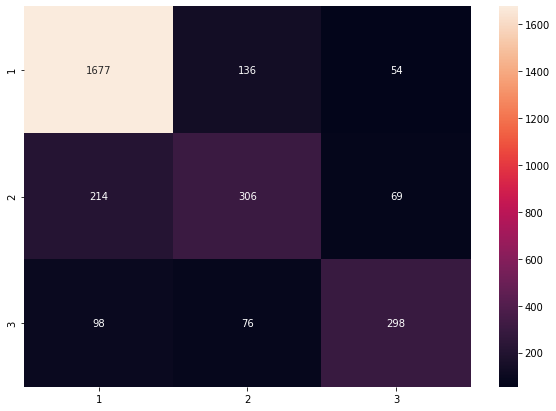

In [41]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Vectorization: Using TF-IDF

**TF-IDF**

**Term Frequency -  Inverse Document Frequency** it makes sure that less importance is given to most frequent words and also considers less frequent words.

**Term Frequency** is number of times a **particular word(W)** occurs in a review divided by totall number of words **(Wr)** in review. The term frequency value ranges from 0 to 1.

**Inverse Document Frequency** is calculated as **log(Total Number of Docs(N) / Number of Docs which contains particular word(n))**. Here Docs referred as Reviews.


**TF-IDF** is **TF * IDF** that is **(W/Wr)*LOG(N/n)**


 Using scikit-learn's tfidfVectorizer we can get the TF-IDF.

So even here we get a TF-IDF value for every word and in some cases it may consider different meaning reviews as similar after stopwords removal. so to over come we can use BI-Gram or NGram.

In [42]:
# Split data into training validation and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#print(X_val.shape,y_val.shape)

(11712,) (2928,) (11712,) (2928,)


In [43]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000,ngram_range = (1,2))
X_train = vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)
X_train = X_train.toarray()                        # Convert the data features to array.

In [44]:
X_train.min(),X_train.max()

(0.0, 1.0)

- Advantage of TF-IDF is 
reduce the impact of tokensthat 
occur very frequently, hence 
offering little to none in terms of 
information
- value of TF-IDF lies betwen 0-1

### Fit and evaluate the model using TF-IDF coded words

In [45]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import numpy as np

forest = RandomForestClassifier(n_estimators=100, n_jobs=4,class_weight='balanced')

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7641736592218663


In [46]:
result = forest.predict(X_test) #predicting the result

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, result)

0.7766393442622951

- Accuracy on test data is 77.66%

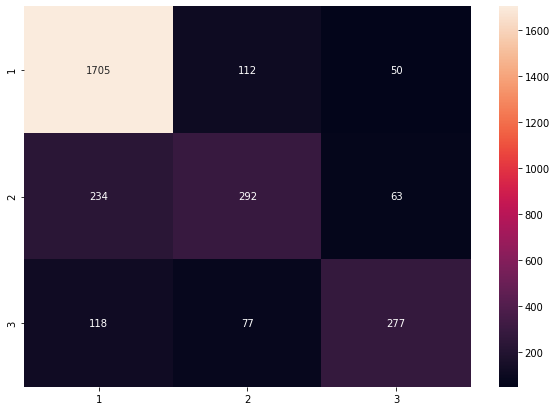

In [49]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- By observing confusion matrix, In this case,we feel count vectorizer is better as it give more accurate results for neutral and positive comments

### Summary:

- We used dataset which has tweets in text format and their sentiment scores as positive, negative and neutral
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
  - Used beautiful soup for removing html
  - We have also removed url and emojis
  -Removed numbers,puctuations, special characters which acts as noise to the text
  -We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words
  -Removing stopwords is great as it lowers the dimensionality while using vectorization
 
  - Converted all to lowercase, that also helps in dimensionality reduction as python is case sensitive

  - As the data is less ,we used lemmatizing as it is more meaningful than stemming
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- It can be converted using countvectorizer or TF-IDF
- TF-IDF value for every word and in some cases it may consider different meaning reviews as similar after stopwords removal. so to over come we can use BI-Gram or NGram.
- We build the classification model for countvectorized data and TF-IDF data , we predicted the result for the test data.
- Only a slight variation of accuracy for TF-IDF vectorized data has been observed
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- We have used weighted loss as data is imbalanced. Used random forest clasiifier
- One more way to increase accuracy is to use different variations of Pre-processing techniques.
- Also for increasing accuracy, we can increase the data collection we have.